In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
leases = pd.read_csv("../../data/Leases.csv")

In [3]:
sf = leases[leases['market'].fillna('').str.lower().isin(['san francisco', 'south bay/san jose'])]


/var/folders/4g/nqxcgmps22dbx0qvs4pk9mdh0000gn/T/ipykernel_85864/4256898404.py:121: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figures[0].show()


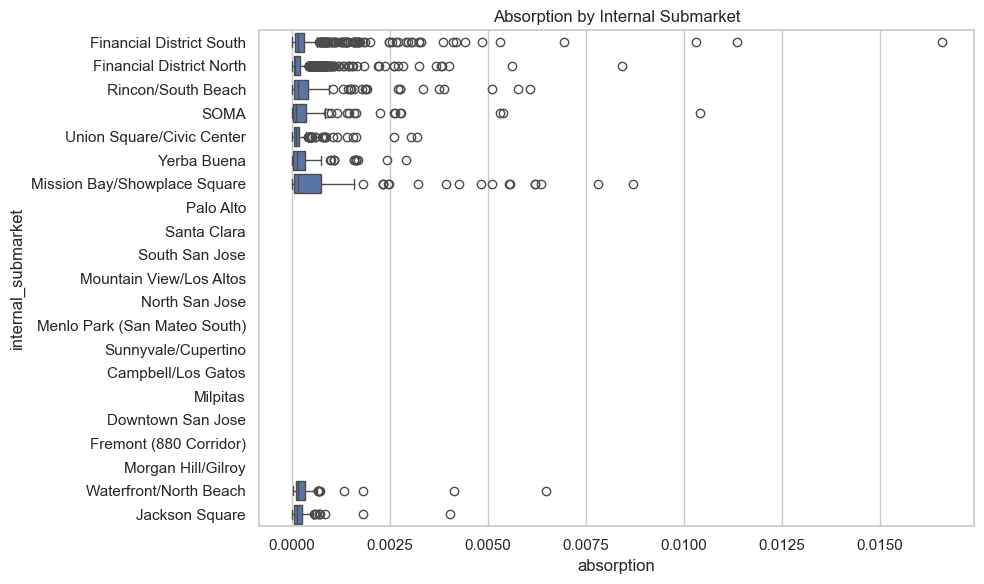

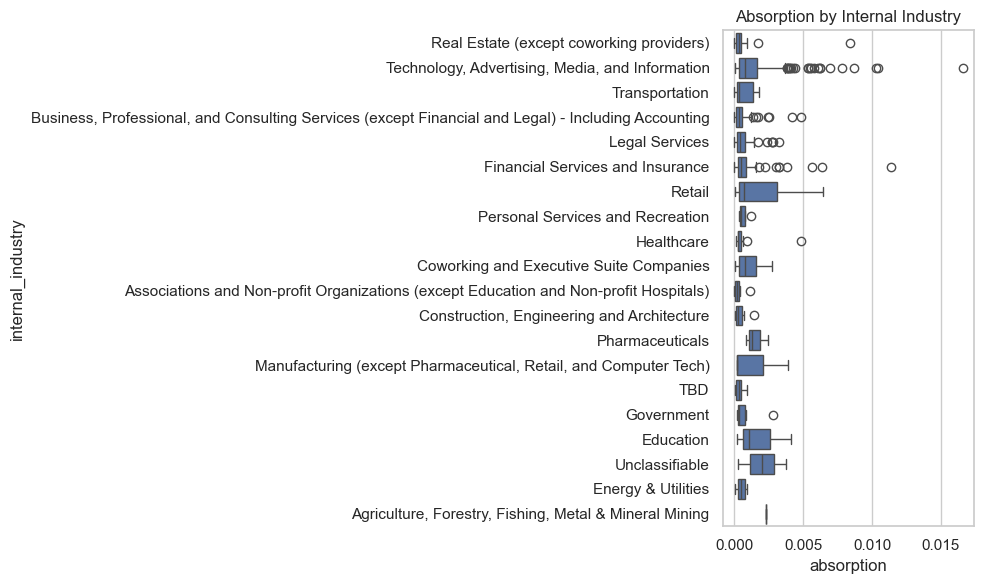

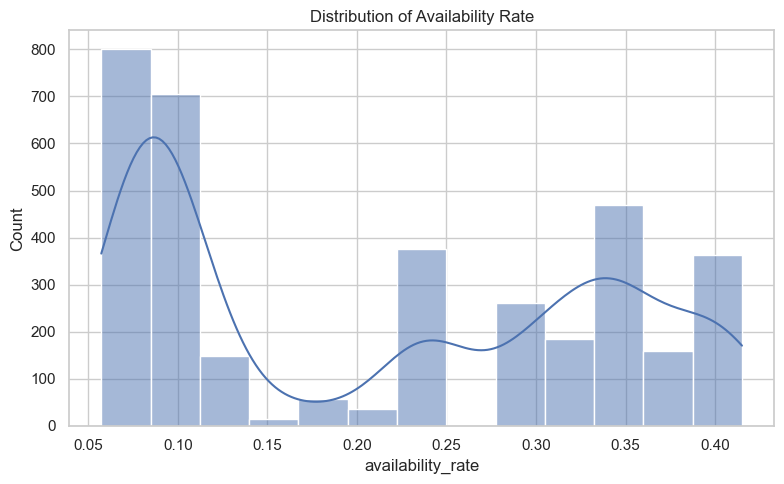

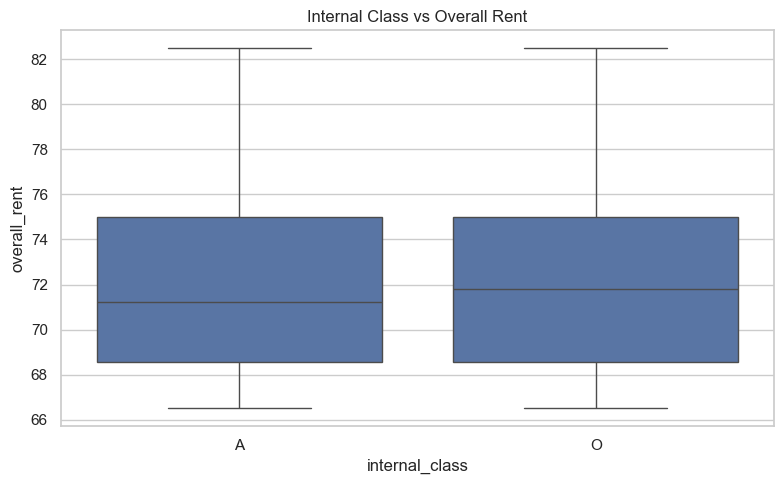

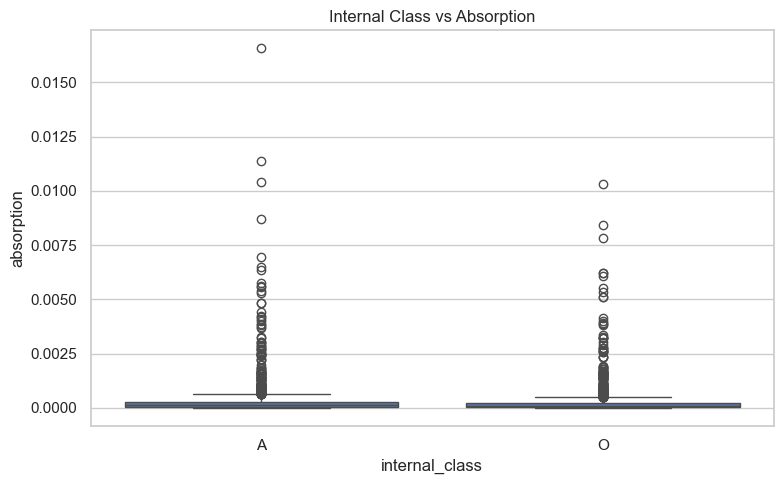

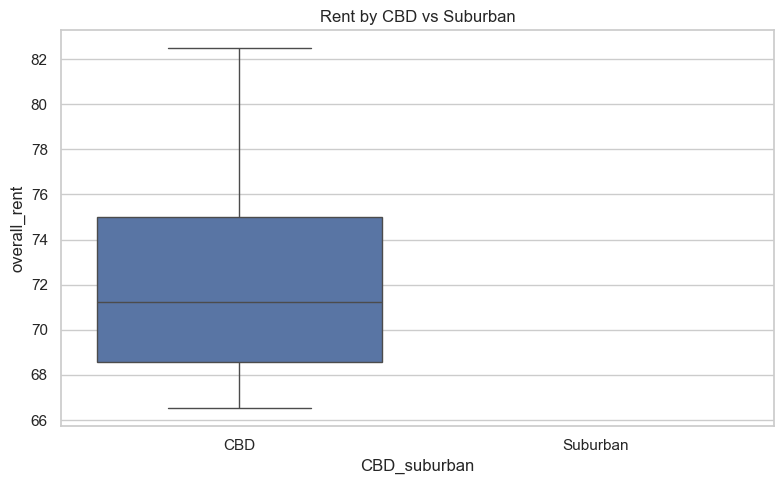

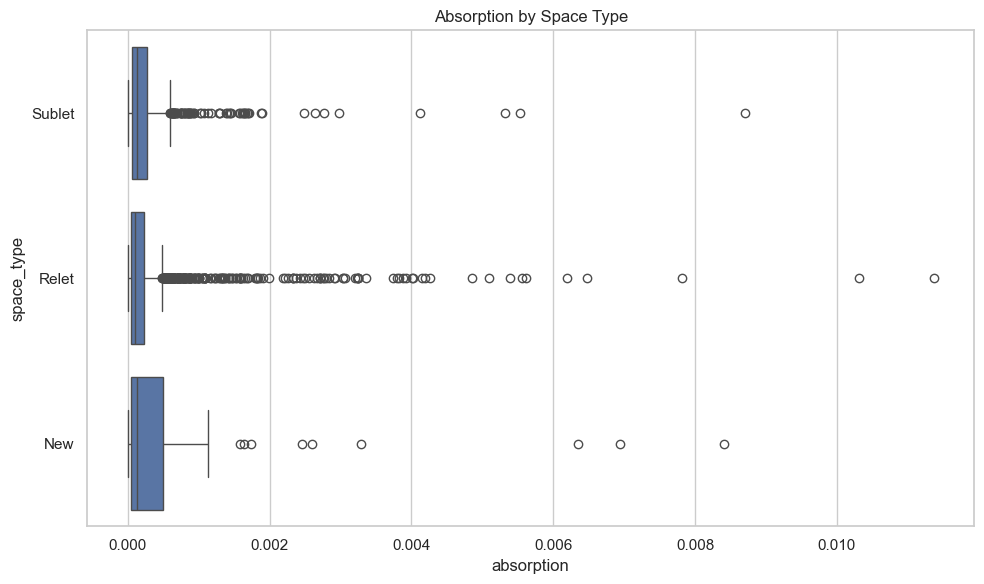

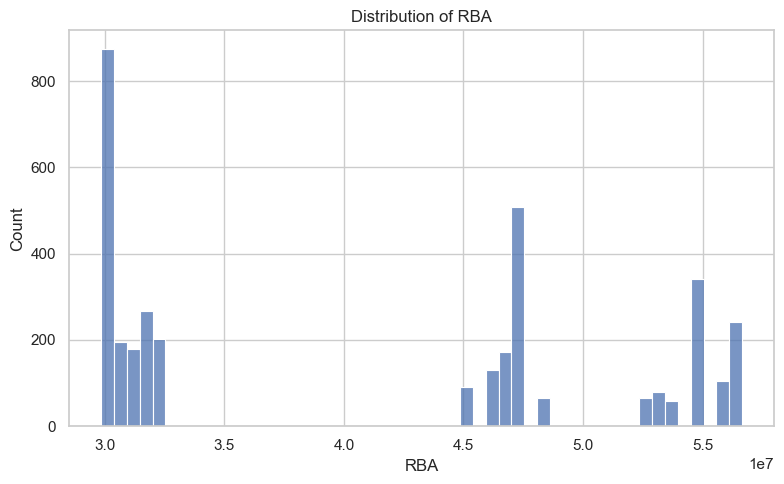

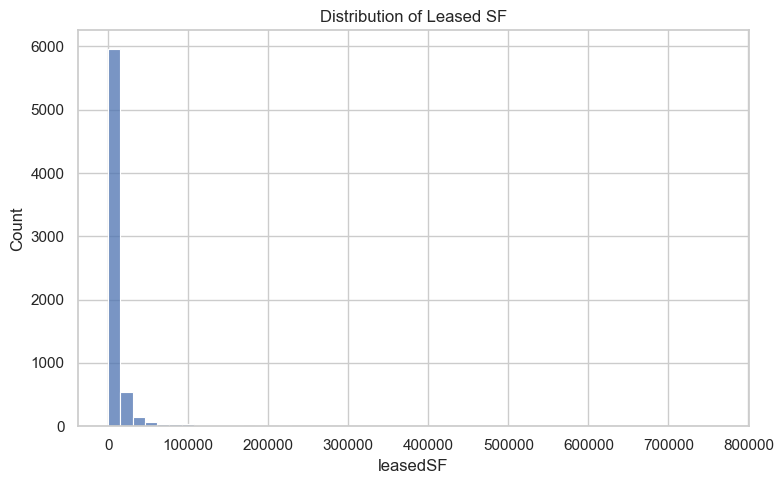

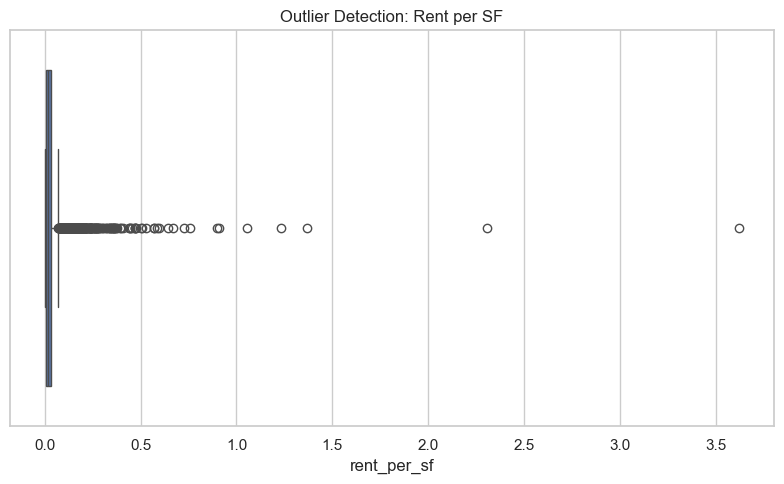

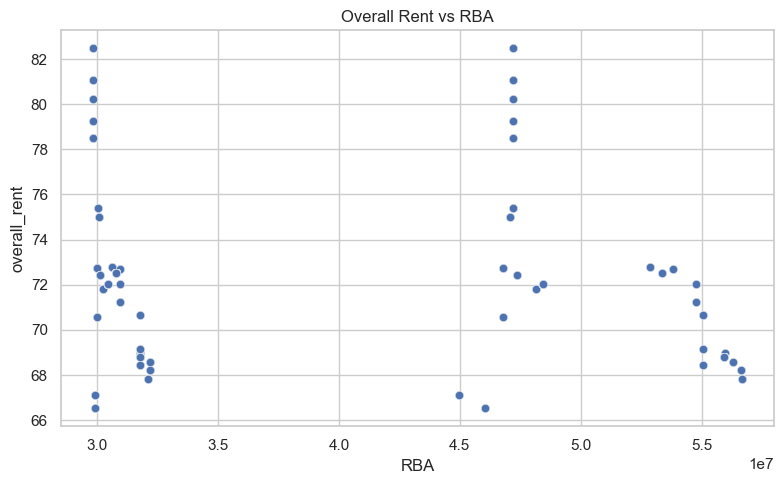

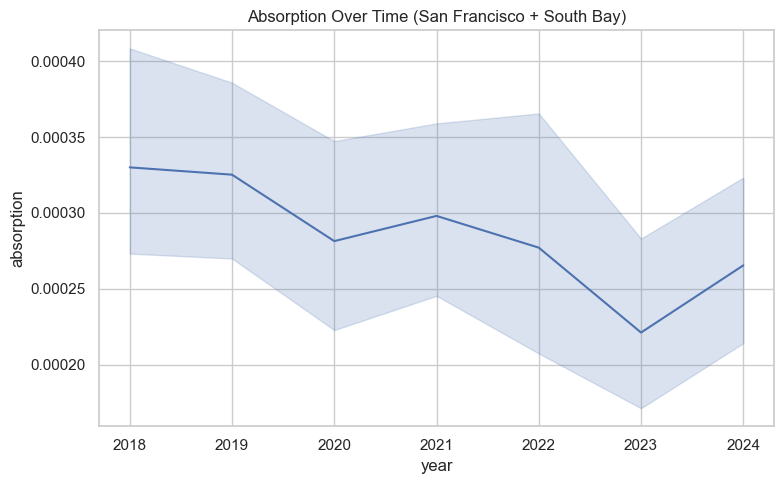

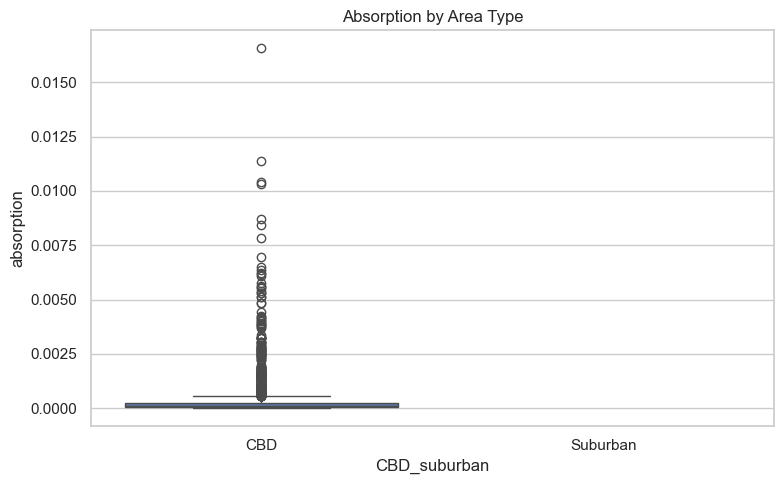

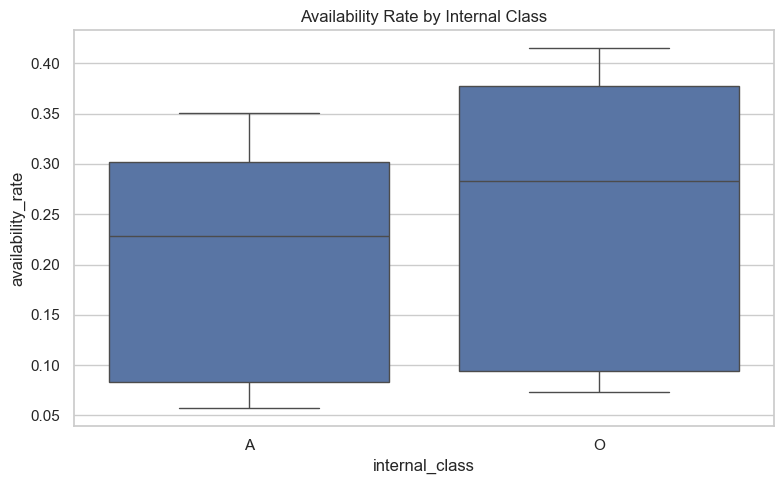

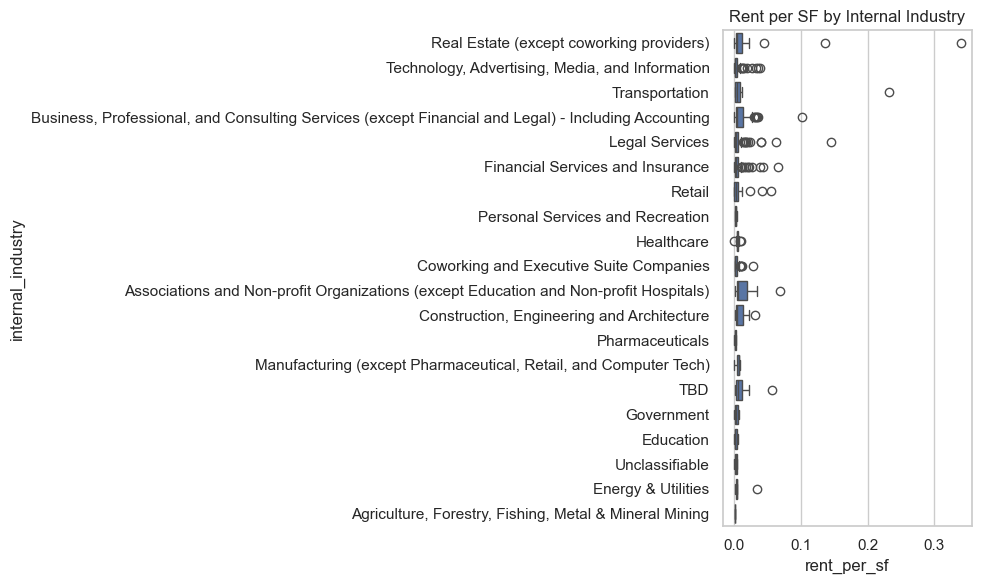

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load and filter data for San Francisco + South Bay
leases = pd.read_csv("Leases.csv")
sf = leases[leases['market'].fillna('').str.lower().isin(['san francisco', 'south bay/san jose'])].copy()
sf["absorption"] = sf["leasedSF"] / sf["RBA"]
sf["availability_rate"] = sf["available_space"] / sf["RBA"]
sf["rent_per_sf"] = sf["overall_rent"] / sf["leasedSF"]

sns.set(style="whitegrid")
figures = []

# 1. Absorption by Internal Submarket
plt.figure(figsize=(10, 6))
sns.boxplot(data=sf, x="absorption", y="internal_submarket")
plt.title("Absorption by Internal Submarket")
plt.tight_layout()
figures.append(plt.gcf())

# 2. Absorption by Internal Industry
plt.figure(figsize=(10, 6))
sns.boxplot(data=sf, x="absorption", y="internal_industry")
plt.title("Absorption by Internal Industry")
plt.tight_layout()
figures.append(plt.gcf())

# 3. Availability Rate Distribution
plt.figure(figsize=(8, 5))
sns.histplot(sf["availability_rate"].dropna(), kde=True)
plt.title("Distribution of Availability Rate")
plt.tight_layout()
figures.append(plt.gcf())

# 4. Internal Class vs Overall Rent
plt.figure(figsize=(8, 5))
sns.boxplot(data=sf, x="internal_class", y="overall_rent")
plt.title("Internal Class vs Overall Rent")
plt.tight_layout()
figures.append(plt.gcf())

# 5. Internal Class vs Absorption
plt.figure(figsize=(8, 5))
sns.boxplot(data=sf, x="internal_class", y="absorption")
plt.title("Internal Class vs Absorption")
plt.tight_layout()
figures.append(plt.gcf())

# 6. Rent by CBD vs Suburban
plt.figure(figsize=(8, 5))
sns.boxplot(data=sf, x="CBD_suburban", y="overall_rent")
plt.title("Rent by CBD vs Suburban")
plt.tight_layout()
figures.append(plt.gcf())

# 7. Absorption by Space Type
plt.figure(figsize=(10, 6))
sns.boxplot(data=sf, x="absorption", y="space_type")
plt.title("Absorption by Space Type")
plt.tight_layout()
figures.append(plt.gcf())

# 8. Histogram of RBA
plt.figure(figsize=(8, 5))
sns.histplot(sf["RBA"].dropna(), bins=50)
plt.title("Distribution of RBA")
plt.tight_layout()
figures.append(plt.gcf())

# 9. Histogram of Leased SF
plt.figure(figsize=(8, 5))
sns.histplot(sf["leasedSF"].dropna(), bins=50)
plt.title("Distribution of Leased SF")
plt.tight_layout()
figures.append(plt.gcf())

# 10. Outlier Analysis: Rent per SF
plt.figure(figsize=(8, 5))
sns.boxplot(x=sf["rent_per_sf"].dropna())
plt.title("Outlier Detection: Rent per SF")
plt.tight_layout()
figures.append(plt.gcf())

# 11. Overall Rent vs RBA (Scatter)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sf, x="RBA", y="overall_rent", alpha=0.5)
plt.title("Overall Rent vs RBA")
plt.tight_layout()
figures.append(plt.gcf())

# 12. Absorption Over Time
plt.figure(figsize=(8, 5))
sns.lineplot(data=sf, x="year", y="absorption")
plt.title("Absorption Over Time (San Francisco + South Bay)")
plt.tight_layout()
figures.append(plt.gcf())

# 13. Absorption by Area Type (CBD vs Suburban)
plt.figure(figsize=(8, 5))
sns.boxplot(data=sf, x="CBD_suburban", y="absorption")
plt.title("Absorption by Area Type")
plt.tight_layout()
figures.append(plt.gcf())

# 14. Availability Rate by Internal Class
plt.figure(figsize=(8, 5))
sns.boxplot(data=sf, x="internal_class", y="availability_rate")
plt.title("Availability Rate by Internal Class")
plt.tight_layout()
figures.append(plt.gcf())

# 15. Rent per SF by Internal Industry
plt.figure(figsize=(10, 6))
sns.boxplot(data=sf, y="internal_industry", x="rent_per_sf")
plt.title("Rent per SF by Internal Industry")
plt.tight_layout()
figures.append(plt.gcf())

# Show the first figure; others will be available in `figures`
figures[0].show()

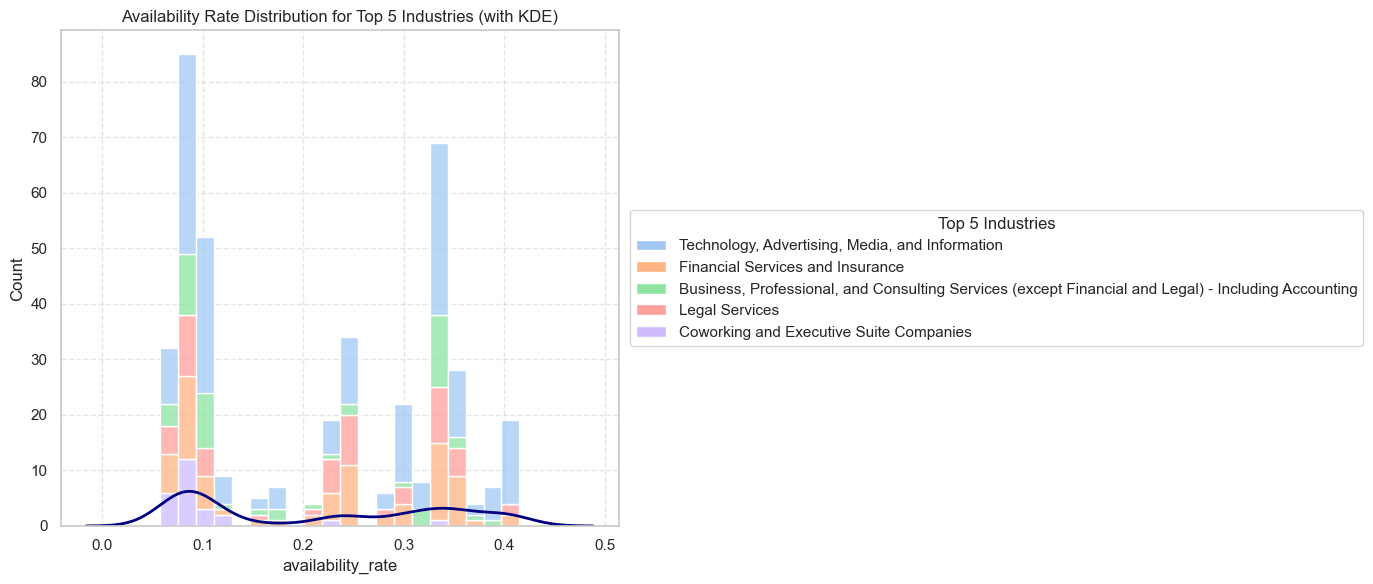

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch

# Get top 5 industries from sf data
top5 = sf['internal_industry'].value_counts().head(5).index
sf_top5 = sf[sf['internal_industry'].isin(top5)]

# Define color palette for those top 5 industries
palette_top5 = sns.color_palette("pastel", n_colors=5)
industry_colors_top5 = dict(zip(top5, palette_top5))

plt.figure(figsize=(14, 6))

# Plot histogram segmented by top 5 industries
sns.histplot(data=sf_top5, x="availability_rate", hue="internal_industry",
             multiple="stack", bins=20, kde=False, palette=industry_colors_top5, alpha=0.75, legend=False)

# Add overall KDE curve
sns.kdeplot(data=sf["availability_rate"].dropna(), color="navy", linewidth=2)

# Custom legend placed outside
handles = [Patch(facecolor=industry_colors_top5[ind], label=ind) for ind in industry_colors_top5]
plt.legend(handles=handles, title="Top 5 Industries", loc="center left", bbox_to_anchor=(1.02, 0.5), borderaxespad=0.)

plt.title("Availability Rate Distribution for Top 5 Industries (with KDE)")
plt.xlabel("availability_rate")
plt.ylabel("Count")
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()